# Random Numbers

Calculating a series of random numbers can be useful when simulating various real-world effects and behaviours. It might be that there is some heterogeneity in the population that you want to model, or that you want to simulate some random events. In other cases, we want to In this notebook we will look at how to generate random numbers in Python using Numpy.

## Generating Random Numbers

The module ```numpy.random``` contains a [suite of tools](https://numpy.org/doc/stable/reference/random/index.html#module-numpy.random) which generate random numbers. The recommended way to use this module to generate random numbers is to create a random number generator using the ```numpy.random.default_rng()``` function:

In [1]:
import numpy as np

# Create a generator object
generator = np.random.default_rng()

#Check its type
print(type(generator))

<class 'numpy.random._generator.Generator'>


This generator contains several methods which generates random numbers from different distributions. These values will be returned in ```numpy``` arrays.

Throughout this notebook, we will be using the Python package ```matplotlib``` to plot a histogram displaying the distribution of the random numbers we generate. You will learn more about ```matplotlib``` tomorrow. For now, don't worry about exactly how it works.

### Uniform Distribution

The uniform distribution is a distribution where all values are equally likely. The ```random``` method takes one argument and generates that many random numbers uniformly distributed between 0 and 1:

[0.01458456 0.37037624 0.38613804 0.60002714 0.38178529 0.48254453
 0.16129002 0.6086067  0.54243811 0.46650566]


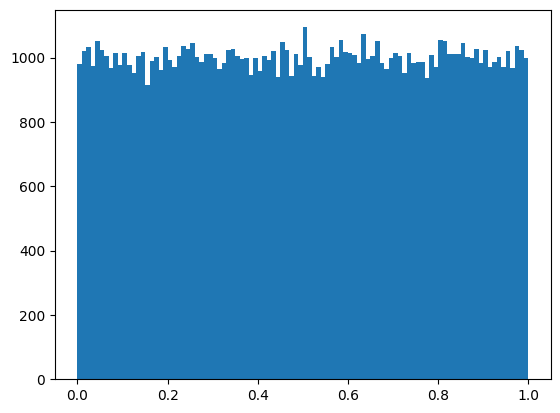

In [7]:
uniform = generator.random(10)

print(uniform)

import matplotlib.pyplot as plt

plt.hist(generator.random(100000), bins=100)

plt.show()

Alternatively, we can use the ```uniform``` method to generate random numbers uniformly distributed between two values. This methods receives three arguments: the lower bound and the upper bound of the distribution and the number of numbers to generate:

[100.93554697 105.33440826 138.24466596 166.24361336 190.28097421
 113.65369154 115.4784098  121.24318878 184.17391096 161.42790843]


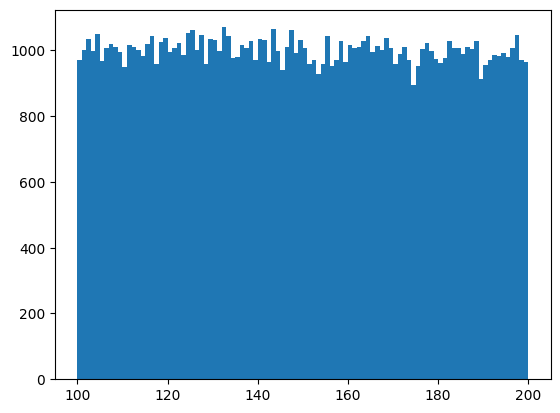

In [12]:
uniform = generator.uniform(100, 200, 10) # Generate ten random numbers between 100 and 200

print(uniform)

plt.hist(generator.uniform(100, 200, 100000), bins=100)
plt.show()

### Normal Distribution

We can draw numbers from a normal distribution (also known as a Gaussian distribution) using the ```normal``` method. This method takes three arguments: the mean of the distribution, the standard deviation of the distribution and the number of numbers to generate:

[ 0.61599852 -0.3803947  -1.34392081 -0.0375831  -0.29064413 -0.48419876
  0.77050818 -0.58621237  0.56877315 -0.23172862]


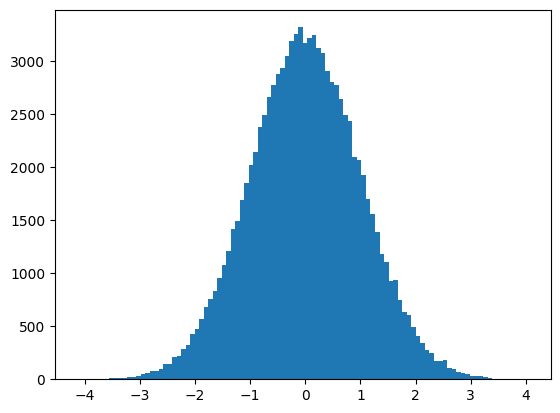

In [13]:
gaussian = generator.normal(0, 1, 10) # Generate ten random numbers from a Gaussian distribution with mean 0 and standard deviation 1

print(gaussian)

plt.hist(generator.normal(0, 1, 100000), bins=100)
plt.show()

### Uniformly Distributed Integers

We can also generate random integers uniformly distributed between two values using the ```integers``` method. This method takes three arguments: the lower bound of the distribution, the upper bound of the distribution and the number of numbers to generate. Note the distribution is inclusive of the lower bound but exclusive of the upper bound.

[7 4 0 8 8 6 5 3 3 6]


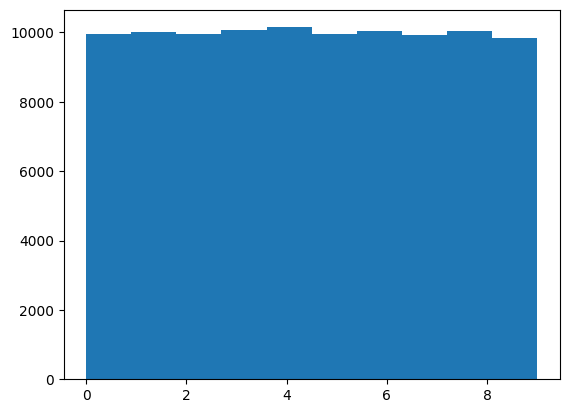

In [19]:
integers = generator.integers(0, 10, 10) # Generate ten random integers between 0 and 10

print(integers)

plt.hist(generator.integers(0, 10, 100000), bins=10)
plt.show()

### Binomial Distribution

The binomial distribution is a discrete distribution which describes the number of successes in a sequence of independent trials. The ```binomial``` method takes three arguments: the number of trials, the probability of success and the number of numbers to generate:

[55 47 48 48 50 58 45 62 60 51]


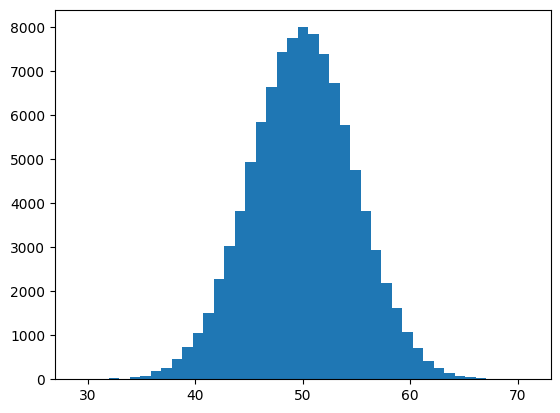

In [15]:
binomial = generator.binomial(100, 0.5, 10) # Generate ten random numbers from a binomial distribution with 100 trials and probability of success 0.5

print(binomial)

large_binomial = generator.binomial(100, 0.5, 100000) # Generate 100000 random numbers from a binomial distribution with 100 trials and probability of success 0.5
plt.hist(large_binomial, bins=max(large_binomial) - min(large_binomial) + 1)
plt.show() # Note this is a discrete distribution so the bins are integers

There are lots of other distributions that we can draw random numbers from. We won't run through each of them, but you can find a full list of them [here](https://numpy.org/doc/stable/reference/random/generator.html#distributions).

## Randomising an Order

We can also randomise a sequence of numbers using the ```shuffle``` method. This method takes a sequence as an argument and shuffles it in place. This means that the method doesn't return a value, but will replace the original sequence with a shuffled version of it:

In [23]:
names = ["Katerina", "Chris", "John", "Liam", "Jay"]
print(generator.shuffle(names)) # Shuffle a list of names. This functions returns None
print(names) # Note that the list has been shuffled

numbers = np.arange(10)
generator.shuffle(numbers) # Shuffle a list of numbers
print(numbers)

None
['Jay', 'Liam', 'John', 'Katerina', 'Chris']
[0 3 1 7 6 5 4 8 2 9]


## Not so Random?

The random number generator is actually a pseudo-random number generator. This means that the numbers it generates are not truly random, but are generated using a deterministic algorithm. This algorithm is designed to produce numbers that are statistically indistinguishable from random numbers. This means that the numbers it generates are random enough for most purposes, but are not truly random. For instance, the numbers are perfectly suitable for statistical modelling, but not for cryptography.

The random number generator is initialised with a seed value. This seed value determines the sequence of numbers that will be generated. We can set the seed value when we create a random number generator. If we do not, as above, the seed value will be set to a non-deterministic value drawn from the computer, such as the current time. This means two generators will generator different random sequences, or that the same code will generate different results each time it is run.

In [28]:
# Create two different generators without providing a seed
generator1 = np.random.default_rng()
generator2 = np.random.default_rng()

# These generators will (probably) generate different random numbers
print(generator1.integers(0, 10, 10)) # Generate ten random numbers from generator1
print(generator2.integers(0, 10, 10)) # Generate ten random numbers from generator2

[1 1 7 7 2 5 7 6 8 3]
[8 7 3 6 0 7 4 1 6 6]


However, setting a specific seed can be useful when we want to ensure that our code will always produce the same results. For example, if we are writing a simulation, we might want to ensure that the same sequence of random numbers is generated each time we run the simulation. This will ensure that the results of the simulation are reproducible. This is particularly useful for testing, debugging, and allowing others to replicate your research.

We can set the seed by providing it as a an argument when creating a random number generator. It is best practice to make this a large, unique integer, to make sure the results of the generator are not unintentionally the same as the results of another generator used in your code or someone else's code by chance.

In [29]:
# Create two different generators providing the same seed
generator1 = np.random.default_rng(6390573940573930)
generator2 = np.random.default_rng(6390573940573930)

# These generators will generate the same random numbers
print(generator1.integers(0, 10, 10)) # Generate ten random numbers from generator1
print(generator2.integers(0, 10, 10)) # Generate ten random numbers from generator2

[4 9 8 3 5 1 1 1 2 8]
[4 9 8 3 5 1 1 1 2 8]


## Exercise: Monte Carlo Simulation

One way we can generate an approximation of the value of $pi$ is to consider a circle of radius $r$ inside a square with a side length of $2r$.

<center><img src="../Resources/monte_carlo_circle.png" style="height:300px" /></center>

The area of he two shapes are given by:

$$ A_{circle} = \pi r^2 $$
$$ A_{square} = (2r)^2 = 4r^2 $$

We can take the ratio of these two areas to get:

$$ \frac{A_{circle}}{A_{square}} = \frac{\pi r^2}{4r^2} = \frac{\pi}{4} $$

This means that we can approximate the value of $\pi$ by generating a large number of random points inside the square and calculating the ratio of the number of points inside the circle to the total number of points. This process of creating a large number of random points and analysing their statistics is known as a Monte Carlo simulation.

For simplicity, we can set the value of $r$ to 1. We generate $n$ 2D Cartesian points $(x,y)$ where $x$ and $y$ are uniformly distributed between -1 and 1. We can then calculate the distance of each point from the origin using Pythagoras' theorem:

d = $\sqrt{x^2 + y^2}$

If $d$ is less than 1, the point is inside the circle. If $d$ is greater than 1, the point is outside the circle. We can then calculate the ratio of the number of points inside the circle to the total number of points. This ratio will be approximately equal to $\frac{\pi}{4}$.

Write a function below which takes a single argument, $n$, the number of points to generate. The function should return the approximate value of $\pi$.

If you can, try to think about how to use Numpy operations to consider operations on all the points at once, rather than looping over each point individually.

A sample solution can be found in the file [```Sample Solutions/Sample Solutions 7 - Random Numbers.ipynb```](Sample%20Solutions/Sample%20Solutions%207%20-%20Random%20Numbers.ipynb)

10 points: 1.6
100 points: 3.12
100000 points: 3.14064


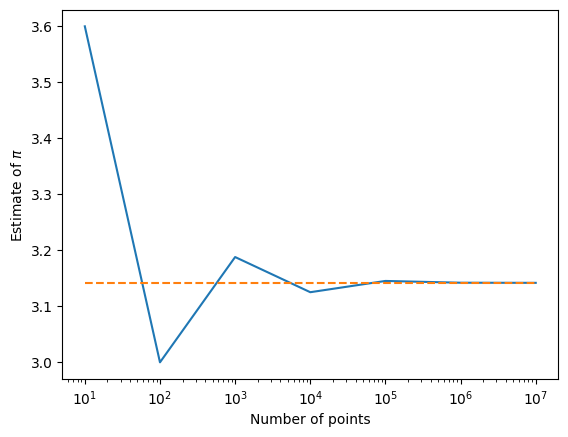

In [47]:
def monte_carlo_pi(n):
    # Write your code here





# Some tests
# Note that, unless you specify a seed, the results will be different each time you run this code
print(f"10 points: {monte_carlo_pi(10)}") # This will give a poor estimate of pi
print(f"100 points: {monte_carlo_pi(100)}") # This will give a slightly better estimate of pi
print(f"100000 points: {monte_carlo_pi(100000)}") # This will give a better estimate of pi

# The following code plots a graph of the estimate of pi against the number of points used in the Monte Carlo simulation
# Don't worry about the details of this code, unless you're interested 
n_points = 10 ** np.arange(1, 8)
pi_estimates = np.array([monte_carlo_pi(n) for n in n_points])
import matplotlib.pyplot as plt
plt.plot(n_points, pi_estimates)
plt.plot(n_points, np.pi * np.ones(len(n_points)), "--")
plt.xscale("log")
plt.xlabel("Number of points")
plt.ylabel("Estimate of $\pi$")
plt.show()